# Applied Statistics

# Gym Members Exercise

In [ ]:
# uploading the csv
df_gym = pd.read_csv('/content/drive/MyDrive/gym_members_exercise_tracking.csv')
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
# making sure the numerical columns are actually numbers all the way.
df_gym.dtypes

,0
Age,int64
Gender,object
Weight (kg),float64
Height (m),float64
Max_BPM,int64
Avg_BPM,int64
Resting_BPM,int64
Session_Duration (hours),float64
Calories_Burned,float64
Workout_Type,object


In [ ]:
# see what different type of workouts we have
print("Unique Workout Types:", df_gym['Workout_Type'].unique())

Unique Workout Types: ['Yoga' 'HIIT' 'Cardio' 'Strength']


In [ ]:
# some basic statistics about the dataset
df_gym.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In this dataset, we will start to investigate the difference between workout types.

## Statistic tests

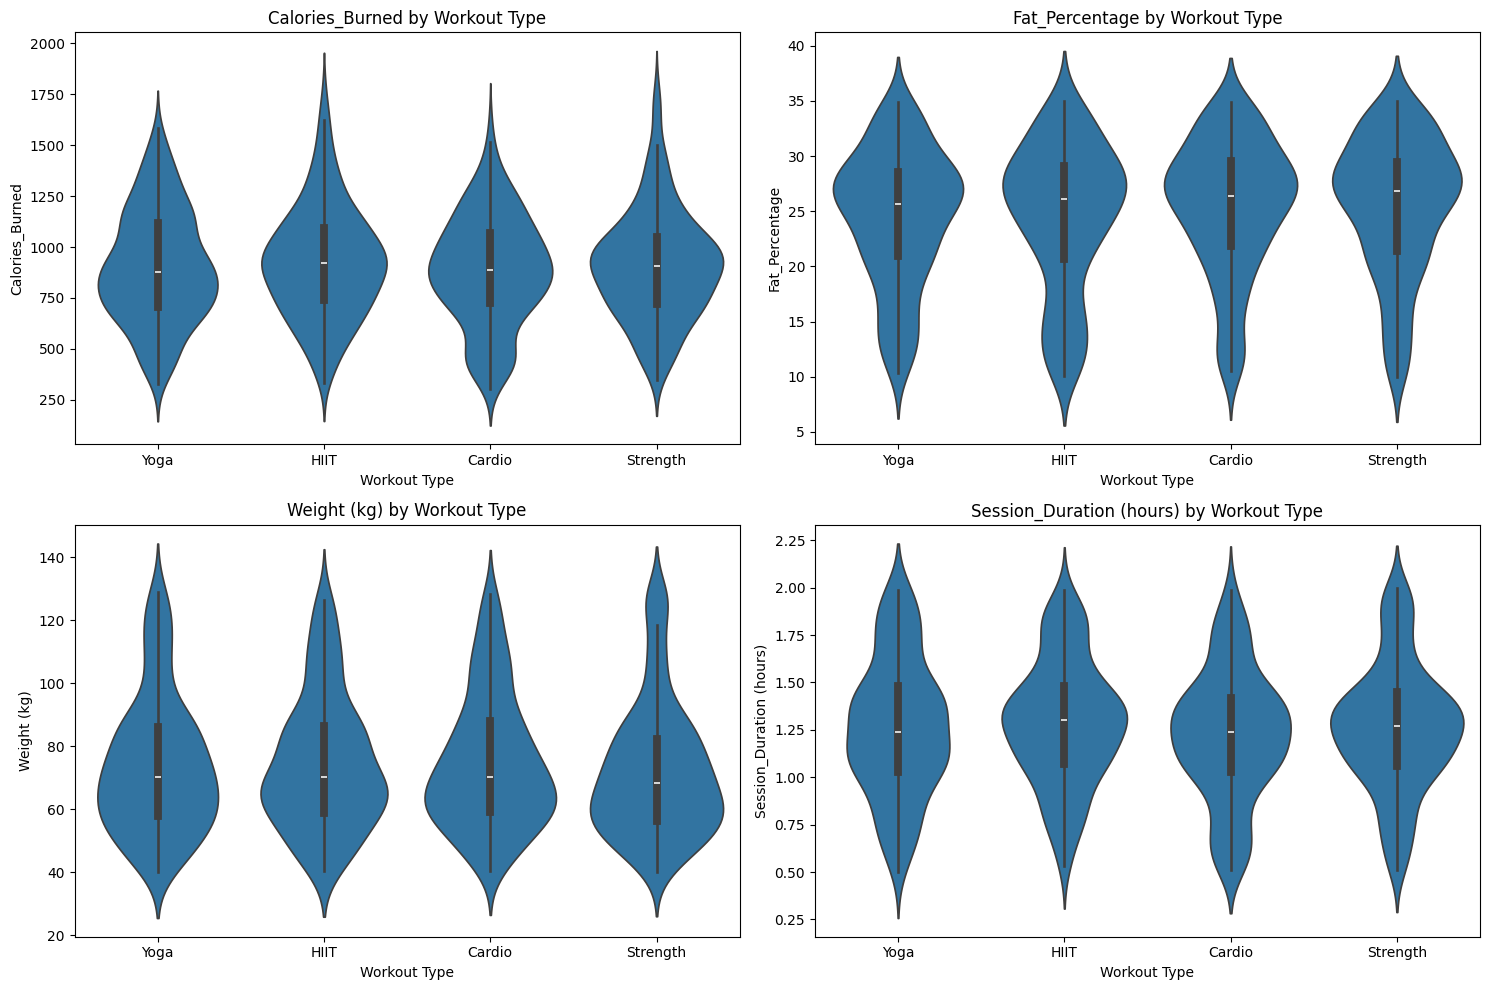

In [ ]:
# violin-plot of clories burned, weight, fat percentage and workout duration based on the workout
features = ['Calories_Burned', 'Fat_Percentage', 'Weight (kg)', 'Session_Duration (hours)']

# Create a figure for the subplots
plt.figure(figsize=(15, 10))

# Violin plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.violinplot(x='Workout_Type', y=feature, data=df_gym)
    plt.title(f'{feature} by Workout Type')
    plt.xlabel('Workout Type')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

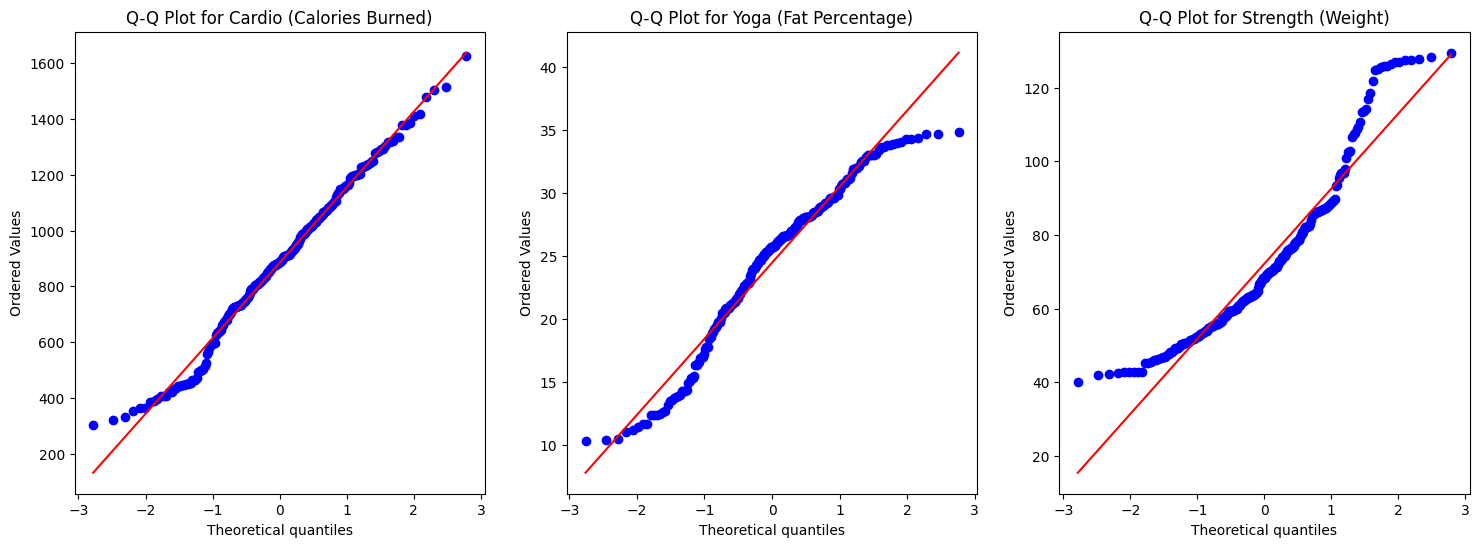

In [ ]:
# Let's check how close some of them are to a normal disterbution:
cardio_calories = df_gym[df_gym['Workout_Type'] == 'Cardio']['Calories_Burned']
yoga_fat_percentage = df_gym[df_gym['Workout_Type'] == 'Yoga']['Fat_Percentage']
strength_weight = df_gym[df_gym['Workout_Type'] == 'Strength']['Weight (kg)']

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
stats.probplot(cardio_calories, dist="norm", plot=plt)
plt.title('Q-Q Plot for Cardio (Calories Burned)')

plt.subplot(1, 3, 2)
stats.probplot(yoga_fat_percentage, dist="norm", plot=plt)
plt.title('Q-Q Plot for Yoga (Fat Percentage)')

plt.subplot(1, 3, 3)
stats.probplot(strength_weight, dist="norm", plot=plt)
plt.title('Q-Q Plot for Strength (Weight)')

plt.show()

We can see that the plots does not distributes normally, therefore we can assume that the tests won't be completly accurate.

In [ ]:
#Confidence Intervals for calories burned:
calories_burned = df_gym['Calories_Burned']
statistic = lambda x: x.mean()
res = stats.bootstrap([calories_burned], statistic, confidence_level=0.95, n_resamples=1000, method='percentile')

print(res.confidence_interval)

ConfidenceInterval(low=888.4402620760534, high=922.9176515930113)


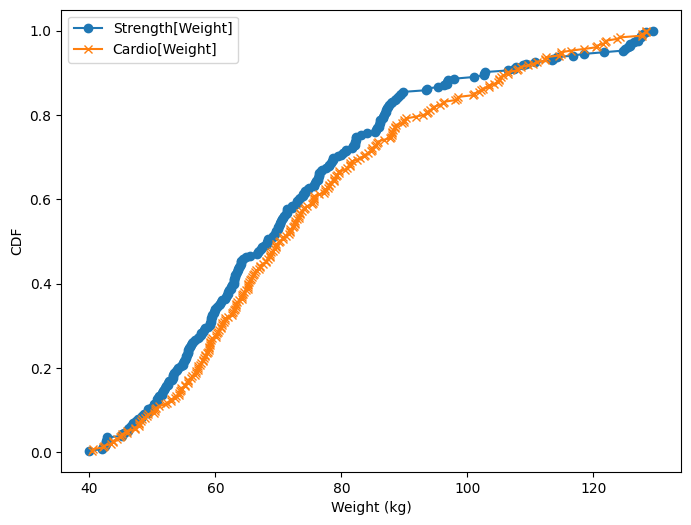

In [ ]:
# let's see how would a Q-Q plot of the weight in two different workout types will look like:
strength_weight = df_gym[df_gym['Workout_Type'] == 'Strength']['Weight (kg)']
cardio_weight = df_gym[df_gym['Workout_Type'] == 'Cardio']['Weight (kg)']

# Ensure both series have the same number of data points by taking the smaller length
min_length = min(len(strength_weight), len(cardio_weight))

# Take a random sample from both to make them the same size
strength_weight_sample = strength_weight.sample(min_length, random_state=42)
cardio_weight_sample = cardio_weight.sample(min_length, random_state=42)

# Sort the data for both Strength and Cardio weight
sorted_strength = np.sort(strength_weight_sample)
sorted_cardio = np.sort(cardio_weight_sample)

# Calculate the CDF for both Strength and Cardio
cdf_strength = np.arange(1, len(sorted_strength) + 1) / len(sorted_strength)
cdf_cardio = np.arange(1, len(sorted_cardio) + 1) / len(sorted_cardio)

# Plot the Empirical CDFs for both Strength[Weight] and Cardio[Weight]
plt.figure(figsize=(8, 6))
plt.plot(sorted_strength, cdf_strength, label='Strength[Weight]', marker='o')
plt.plot(sorted_cardio, cdf_cardio, label='Cardio[Weight]', marker='x')

# Set plot labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('CDF')
plt.legend()

When we use Empirical CDF we see that the disterbutions are similar to one another.

In [ ]:
# to get concrete resultes we will use the KS test:
strength_weight_sample = strength_weight.sample(min_length, random_state=42)
cardio_weight_sample = cardio_weight.sample(min_length, random_state=42)

# Apply the KS test to compare the two distributions
ks_statistic, ks_pvalue = stats.ks_2samp(strength_weight_sample, cardio_weight_sample)

# Print the KS statistic and p-value
print(f"KS Statistic: {ks_statistic}")
print(f"KS P-value: {ks_pvalue}")

# Interpret the result
if ks_pvalue < 0.05:
    print("The distributions are significantly different (reject H0).")
else:
    print("The distributions are not significantly different (fail to reject H0).")

KS Statistic: 0.09411764705882353
KS P-value: 0.20894602299576795
The distributions are not significantly different (fail to reject H0).


We see from the results that they do act the same.

In [ ]:
from scipy.stats import shapiro

# Subset data for each workout type and feature
cardio_calories = df_gym[df_gym['Workout_Type'] == 'Cardio']['Calories_Burned']
yoga_fat_percentage = df_gym[df_gym['Workout_Type'] == 'Yoga']['Fat_Percentage']
strength_weight = df_gym[df_gym['Workout_Type'] == 'Strength']['Weight (kg)']

# Perform Shapiro-Wilk test
shapiro_cardio = shapiro(cardio_calories)
shapiro_yoga = shapiro(yoga_fat_percentage)
shapiro_strength = shapiro(strength_weight)

print("Shapiro-Wilk Test Results:")
print(f"Cardio (Calories Burned): W-stat={shapiro_cardio.statistic:.3f}, p-value={shapiro_cardio.pvalue:.3f}")
print(f"Yoga (Fat Percentage): W-stat={shapiro_yoga.statistic:.3f}, p-value={shapiro_yoga.pvalue:.3f}")
print(f"Strength (Weight): W-stat={shapiro_strength.statistic:.3f}, p-value={shapiro_strength.pvalue:.3f}")

Shapiro-Wilk Test Results:
Cardio (Calories Burned): W-stat=0.989, p-value=0.051
Yoga (Fat Percentage): W-stat=0.959, p-value=0.000
Strength (Weight): W-stat=0.918, p-value=0.000


Looks like they are infact don't distributes normally.

The people in the dataset, as well as the different types of workouts are independent of each other. This is why we will use T-test for independent samples.

In [ ]:
# some examples for independent T-test:
from scipy.stats import ttest_ind

# Yoga[Calories_Burned] and HIIT[Calories_Burned]
yoga_calories = df_gym[df_gym['Workout_Type'] == 'Yoga']['Calories_Burned']
hiit_calories = df_gym[df_gym['Workout_Type'] == 'HIIT']['Calories_Burned']
t_stat1, p_val1 = ttest_ind(yoga_calories, hiit_calories, equal_var=False)
print(f"T-test for Yoga vs. HIIT (Calories_Burned): t-stat={t_stat1:.3f}, p-value={p_val1:.3f}")

# Cardio[Fat_Percentage] and Strength[Fat_Percentage]
cardio_fat = df_gym[df_gym['Workout_Type'] == 'Cardio']['Fat_Percentage']
strength_fat = df_gym[df_gym['Workout_Type'] == 'Strength']['Fat_Percentage']
t_stat2, p_val2 = ttest_ind(cardio_fat, strength_fat, equal_var=False)
print(f"T-test for Cardio vs. Strength (Fat_Percentage): t-stat={t_stat2:.3f}, p-value={p_val2:.3f}")

# Yoga[Weight] and Cardio[Weight]
yoga_weight = df_gym[df_gym['Workout_Type'] == 'Yoga']['Weight (kg)']
cardio_weight = df_gym[df_gym['Workout_Type'] == 'Cardio']['Weight (kg)']
t_stat3, p_val3 = ttest_ind(yoga_weight, cardio_weight, equal_var=False)
print(f"T-test for Yoga vs. Cardio (Weight): t-stat={t_stat3:.3f}, p-value={p_val3:.3f}")

# Cardio[Session_Duration (hours)] and HIIT[Session_Duration (hours)]
cardio_duration = df_gym[df_gym['Workout_Type'] == 'Cardio']['Session_Duration (hours)']
hiit_duration = df_gym[df_gym['Workout_Type'] == 'HIIT']['Session_Duration (hours)']
t_stat4, p_val4 = ttest_ind(cardio_duration, hiit_duration, equal_var=False)
print(f"T-test for Cardio vs. HIIT (Session_Duration): t-stat={t_stat4:.3f}, p-value={p_val4:.3f}")

T-test for Yoga vs. HIIT (Calories_Burned): t-stat=-0.880, p-value=0.379
T-test for Cardio vs. Strength (Fat_Percentage): t-stat=-0.114, p-value=0.909
T-test for Yoga vs. Cardio (Weight): t-stat=-0.497, p-value=0.619
T-test for Cardio vs. HIIT (Session_Duration): t-stat=-2.173, p-value=0.030


We have both low t-stat and high p-value, this helps us see what we already saw on the plot, the fact that we don't have segnificant difference in the means.


Now let's try a few dependent T-tests:

In [ ]:
from scipy.stats import ttest_rel
# in cardio, we will assume that the resting bpm is different from the max bpm.
# let's check it:
cardio_resting_bpm = df_gym[df_gym['Workout_Type'] == 'Cardio']['Resting_BPM']
cardio_max_bpm = df_gym[df_gym['Workout_Type'] == 'Cardio']['Max_BPM']
t_stat1, p_val1 = ttest_rel(cardio_resting_bpm, cardio_max_bpm)
print(f"Paired T-test for Cardio (Resting_BPM vs. Max_BPM): t-stat={t_stat1:.3f}, p-value={p_val1:.3f}")


# we would also like to test if the bmi and fat percentage are close to one another:
fat_percentage = df_gym['Fat_Percentage']
bmi = df_gym['BMI']
t_stat2, p_val2 = ttest_rel(fat_percentage, bmi)
print(f"Paired T-test for Fat_Percentage vs. BMI: t-stat={t_stat2:.3f}, p-value={p_val2:.3f}")

Paired T-test for Cardio (Resting_BPM vs. Max_BPM): t-stat=-143.783, p-value=0.000
Paired T-test for Fat_Percentage vs. BMI: t-stat=0.209, p-value=0.835


We can see that the first test has a p-value of less than 0.000 therefore we can assume that there is a difference. On the other hand looks like the BMI and Fat_Percentage don't have a segnificant difference, which helps us see that they are similar like we thought.

In [ ]:
# U-test
from scipy.stats import mannwhitneyu

water_intake = df_gym["Water_Intake (liters)"].dropna()
avg_bpm = df_gym["Avg_BPM"].dropna()

u_stat, p_value = mannwhitneyu(water_intake, avg_bpm, alternative='two-sided')
print(f"Mann-Whitney U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The two distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the distributions.")

Mann-Whitney U-statistic: 0.0
P-value: 0.0
Reject the null hypothesis: The two distributions are significantly different.


## Ordinary Least Squares

<Axes: xlabel='Session_Duration (hours)', ylabel='Calories_Burned'>

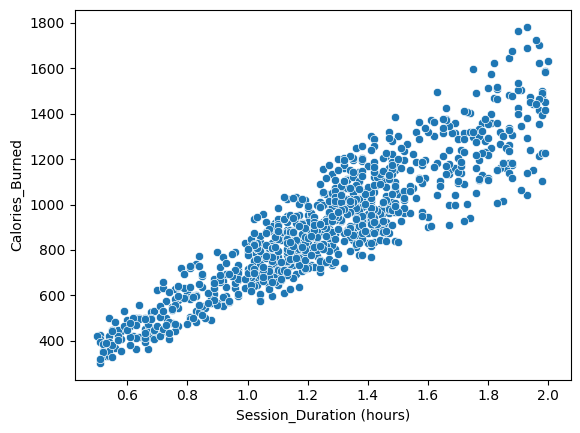

In [ ]:
# doing scatter plot for two connected categories:
sns.scatterplot(data=df_gym, x='Session_Duration (hours)', y='Calories_Burned')

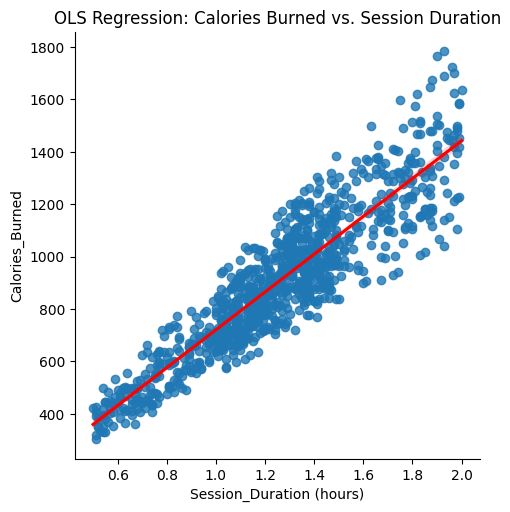

In [ ]:
sns.lmplot(data=df_gym, x='Session_Duration (hours)', y='Calories_Burned', ci=95, line_kws={'color': 'red'})
plt.title('OLS Regression: Calories Burned vs. Session Duration')
plt.show()

In [ ]:
y = df_gym['Calories_Burned']
X = df_gym['Session_Duration (hours)']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     4569.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:06:28   Log-Likelihood:                -5989.7
No. Observations:                 973   AIC:                         1.198e+04
Df Residuals:                     971   BIC:                         1.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

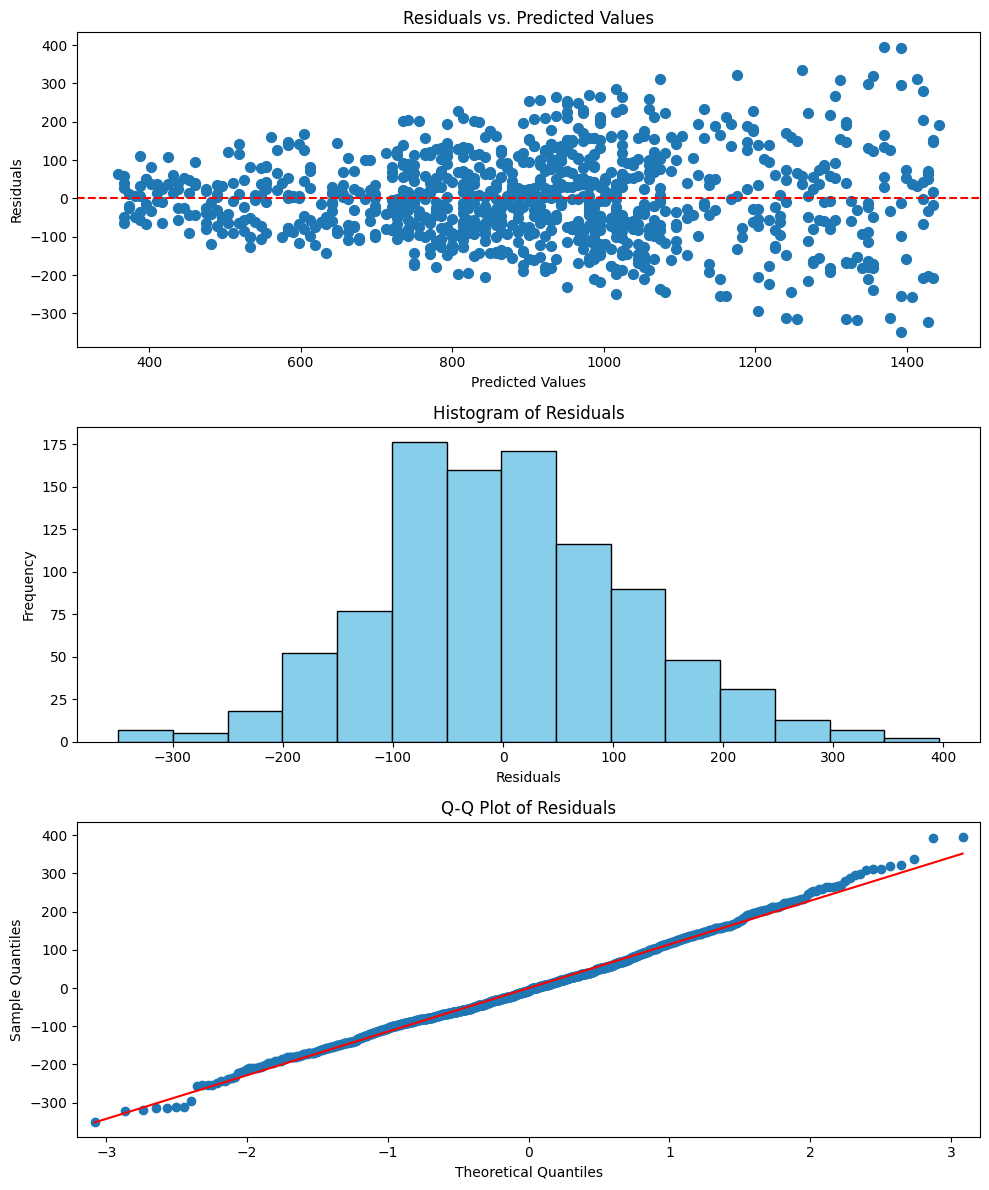

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Scatter plot of predicted values vs residuals
ax = axes[0]
ax.scatter(model.fittedvalues, model.resid, s=50)
ax.axhline(0, color="red", linestyle="--")
ax.set_title("Residuals vs. Predicted Values")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

# Histogram of residuals
ax = axes[1]
ax.hist(model.resid, bins=15, color="skyblue", edgecolor="black")
ax.set_title("Histogram of Residuals")
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")

# Q-Q plot of residuals
ax = axes[2]
sm.graphics.qqplot(model.resid, line="s", ax=ax)
ax.set_title("Q-Q Plot of Residuals")

# Adjust layout
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Influence Plot for Calories_Burned vs. Session_Duration (hours)')

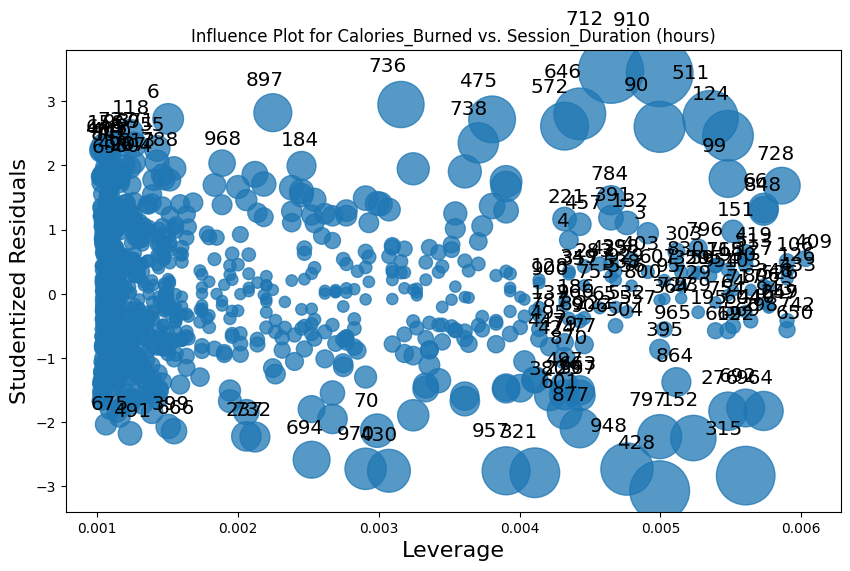

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
model.get_influence().plot_influence(ax=ax)

ax.set_title("Influence Plot for Calories_Burned vs. Session_Duration (hours)")

## Feature Engineering

Let's use a different dataset because ours fits to the linear regression.

In [ ]:
# upload the data:
# uploading the csv
df_FE = pd.read_csv('/content/drive/MyDrive/Inbar Fabian/testRegression.csv')
df_FE.head()

,X,R
0,0.0,-0.226
1,0.1,-0.174
2,0.2,0.459
3,0.3,0.638
4,0.4,0.869


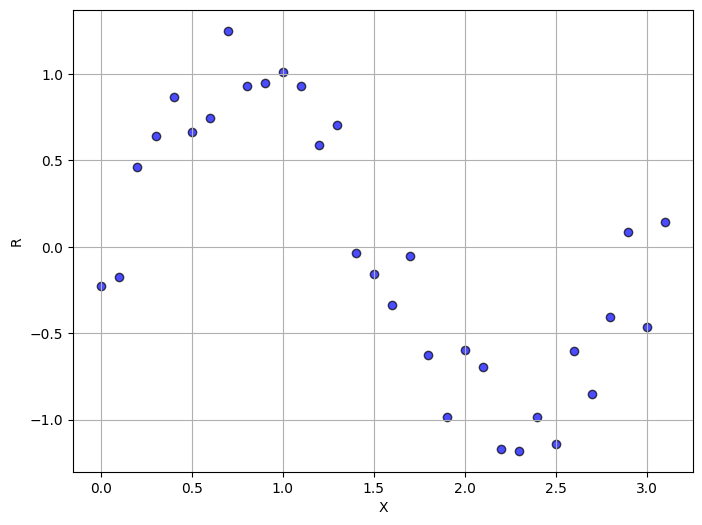

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_FE['X'], df_FE['R'], alpha=0.7, color='blue', edgecolor='k')
plt.xlabel('X')
plt.ylabel('R')
plt.grid(True)
plt.show()

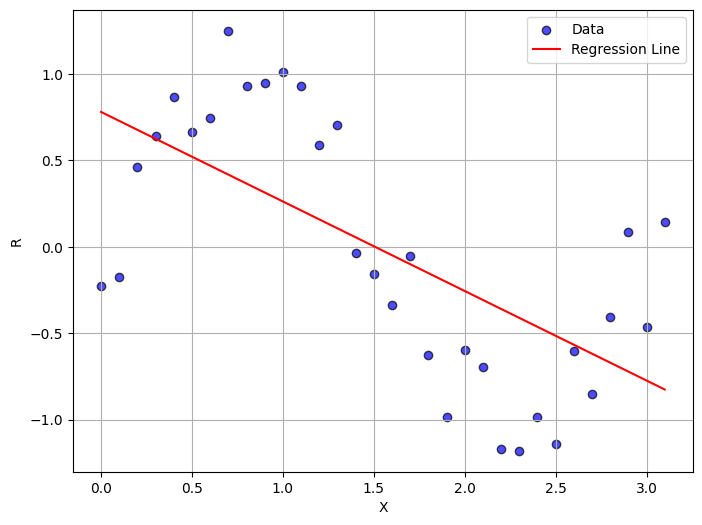

In [ ]:
# trying linear regression:
X = df_FE['X']
y = df_FE['R']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

plt.figure(figsize=(8, 6))
plt.scatter(df_FE['X'], df_FE['R'], alpha=0.7, color='blue', edgecolor='k', label='Data')

# Plot the regression line
X_line = np.linspace(df_FE['X'].min(), df_FE['X'].max(), 100)  # Generate X values for the line
X_line_const = sm.add_constant(X_line)  # Add constant for prediction
y_line = model.predict(X_line_const)  # Predicted values for the regression line
plt.plot(X_line, y_line, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('R')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     21.90
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           5.75e-05
Time:                        20:06:34   Log-Likelihood:                -26.837
No. Observations:                  32   AIC:                             57.67
Df Residuals:                      30   BIC:                             60.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7800      0.200      3.906      0.0

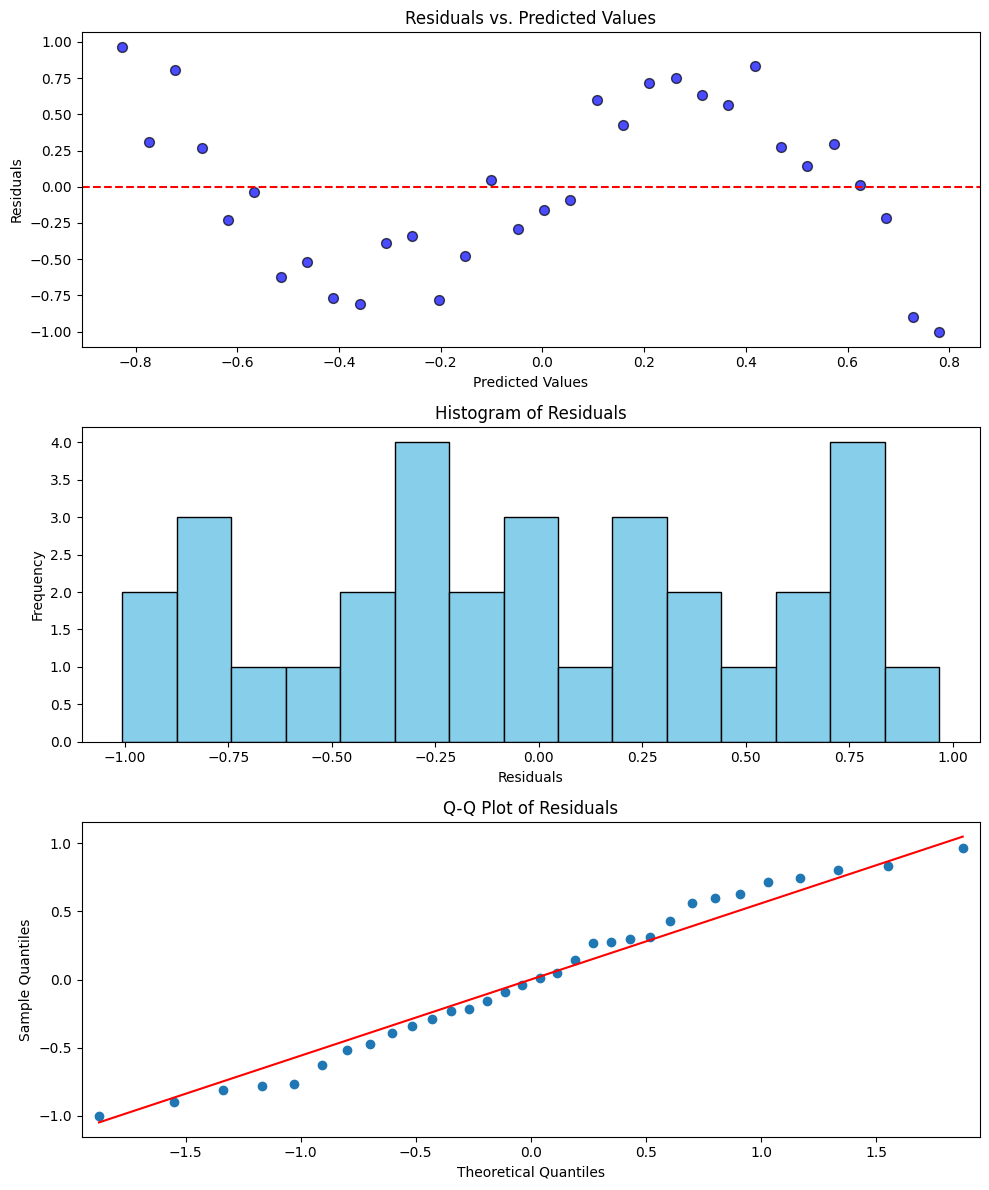

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Scatter plot of predicted values vs residuals
ax = axes[0]
ax.scatter(model.fittedvalues, model.resid, s=50, alpha=0.7, color='blue', edgecolor='k')
ax.axhline(0, color="red", linestyle="--")
ax.set_title("Residuals vs. Predicted Values")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Residuals")

# Histogram of residuals
ax = axes[1]
ax.hist(model.resid, bins=15, color="skyblue", edgecolor="black")
ax.set_title("Histogram of Residuals")
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")

# Q-Q plot of residuals
ax = axes[2]
sm.graphics.qqplot(model.resid, line="s", ax=ax)
ax.set_title("Q-Q Plot of Residuals")

# Adjust layout
plt.tight_layout()
plt.show()

We can see that this is not the right option for regression.

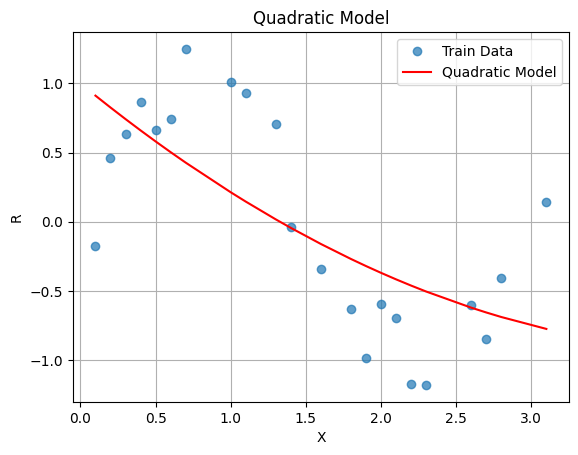

In [ ]:
# let's try quadratic regression:

from sklearn.model_selection import train_test_split
X = df_FE['X'].values  # Independent variable
y = df_FE['R'].values  # Dependent variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a quadratic model: y = w0 + w1 * X + w2 * X^2
X_train_quad = np.column_stack((np.ones_like(x_train), x_train, x_train**2))
w = np.linalg.lstsq(X_train_quad, y_train, rcond=None)[0]

# Generate predictions for training and testing data
y_train_pred = w[0] + w[1] * x_train + w[2] * (x_train**2)
X_test_quad = np.column_stack((np.ones_like(x_test), x_test, x_test**2))
y_test_pred = w[0] + w[1] * x_test + w[2] * (x_test**2)

# Plot for training data
plt.title("Quadratic Model")
plt.plot(x_train, y_train, 'o', label='Train Data', alpha=0.7)
plt.plot(np.sort(x_train), w[0] + w[1] * np.sort(x_train) + w[2] * (np.sort(x_train)**2), label='Quadratic Model', color='red')
plt.legend()
plt.xlabel("X")
plt.ylabel("R")
plt.grid(True)
plt.show()

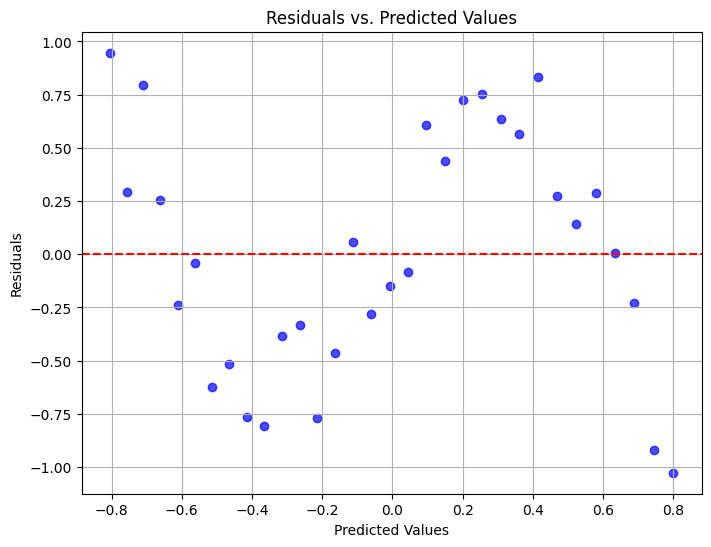

In [ ]:
X_quad = np.column_stack((np.ones_like(X), X, X**2))
w = np.linalg.lstsq(X_quad, y, rcond=None)[0]

# Generate predictions and residuals
y_pred = w[0] + w[1] * X + w[2] * (X**2)
residuals = y - y_pred

# Scatter plot of predicted values vs residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

We can still see order in the residuals, let's try somthing else.

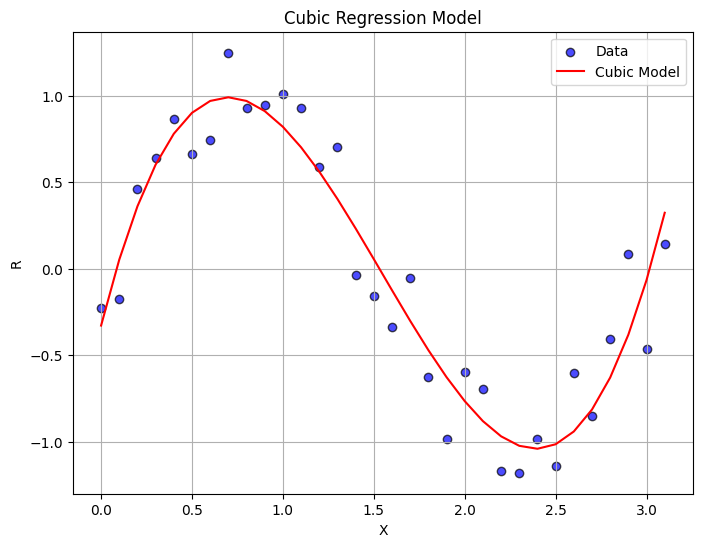

In [ ]:
# now do it for cubic:
X = df_FE['X'].values  # Independent variable
y = df_FE['R'].values  # Dependent variable

# Fit a cubic model: y = w0 + w1 * X + w2 * X^2 + w3 * X^3
X_cubic = np.column_stack((np.ones_like(X), X, X**2, X**3))  # Add constant, X, X^2, X^3
w = np.linalg.lstsq(X_cubic, y, rcond=None)[0]  # Perform least squares fitting

# Generate predictions
y_pred = w[0] + w[1] * X + w[2] * (X**2) + w[3] * (X**3)

# Plot the data and the cubic regression curve
plt.figure(figsize=(8, 6))
plt.title("Cubic Regression Model")
plt.scatter(X, y, alpha=0.7, color='blue', edgecolor='k', label='Data')  # Data points
plt.plot(np.sort(X), w[0] + w[1] * np.sort(X) + w[2] * (np.sort(X)**2) + w[3] * (np.sort(X)**3), color='red', label='Cubic Model')  # Cubic curve
plt.xlabel("X")
plt.ylabel("R")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# cubic regression summery:
X_cubic = sm.add_constant(X_cubic)
model = sm.OLS(y, X_cubic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     96.08
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           7.55e-15
Time:                        20:06:38   Log-Likelihood:                 3.1818
No. Observations:                  32   AIC:                             1.636
Df Residuals:                      28   BIC:                             7.499
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3286      0.148     -2.221      0.0

Looks like we found the right feature.

# Fisher Exact

We will use votes from the last election in the US (from polls), divided by men/women and Trump/Harris.

The information is from https://www.theguardian.com/us-news/2024/oct/25/us-presidential-election-trump-harris-updates.

We will try to see if the gender has any effect on the vote.

In [ ]:
# building the table:
votes = {
    'Men': [53, 37],
    'Women': [36, 53]
}
row_labels = ['Trump', 'Harris']
column_labels = ['Men', 'Women']
crosstab = pd.DataFrame(votes, index=row_labels, columns=column_labels)

print(crosstab)


        Men  Women
Trump    53     36
Harris   37     53


In [ ]:
stats.fisher_exact(crosstab)
## p-value less than 0.05!

SignificanceResult(statistic=2.108858858858859, pvalue=0.016826133982362955)

# Breast Cancer

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# uploading the csv
df_cancer = pd.read_csv('/content/drive/MyDrive/data.csv')
df_cancer = df_cancer.drop(columns=['id','Unnamed: 32'])
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M': 1, 'B': 0})
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Colinearity & VIF

The main problem in this dataset for regressions is that a lot of the variables are dependent. so in this example we will reduce the number of variables based on the VIF.

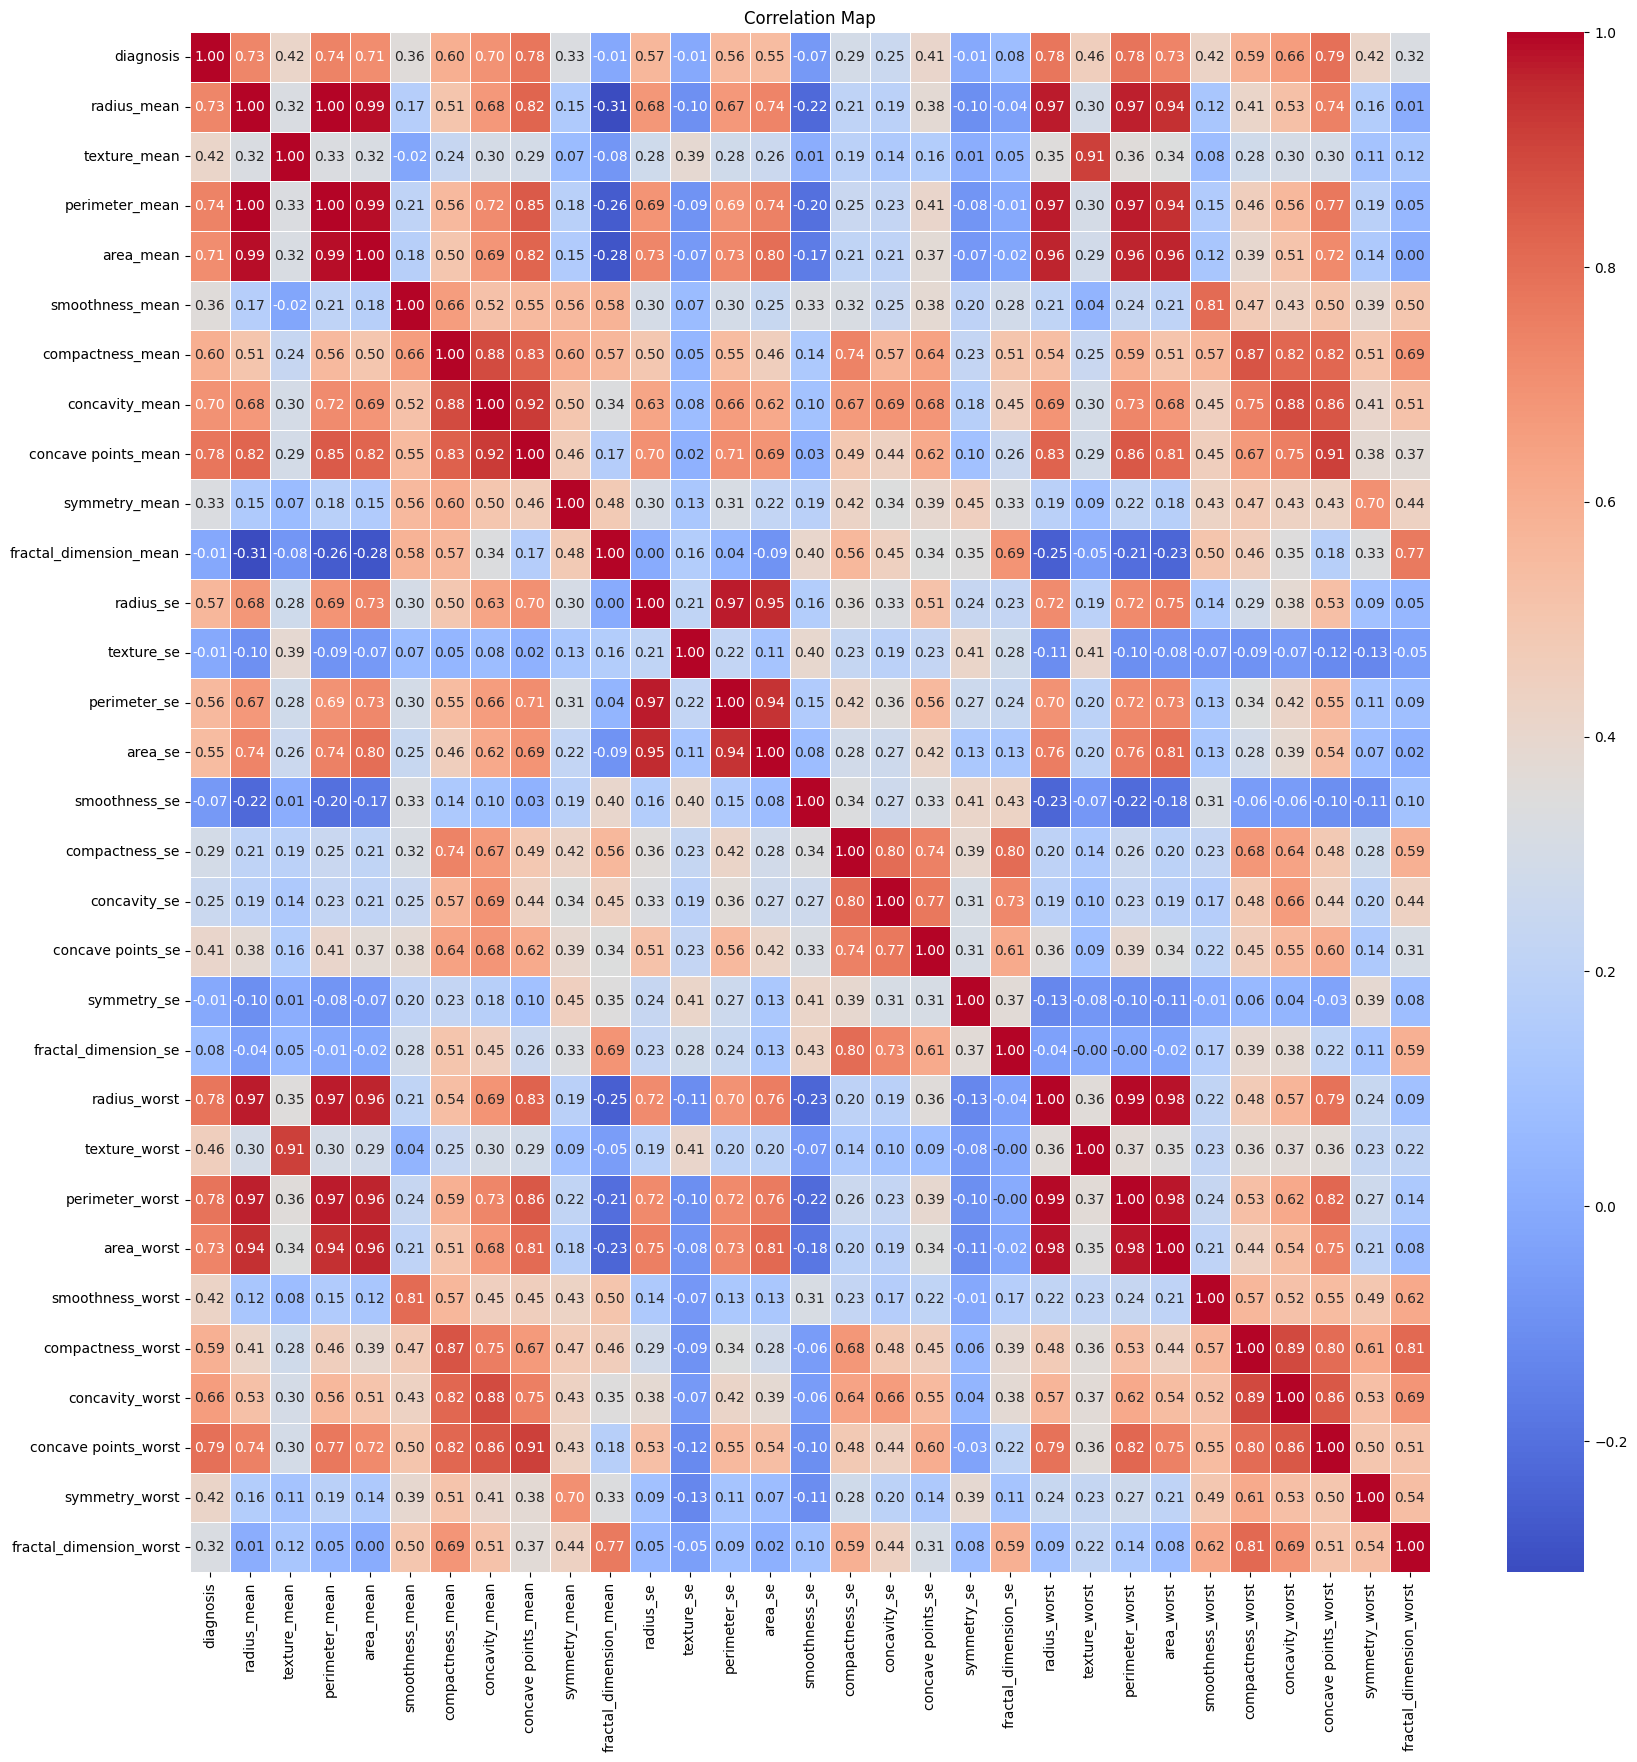

In [ ]:
# correlation map
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df_cancer.corr(), cmap="coolwarm", annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

We want to seperate by groups with high correlation to one another.

This act will allow us to perform 'feature selection' - select represenatives from each group and see how only they affect the diagnosis

In [ ]:
correlation_matrix = df_cancer.corr().abs()
threshold = 0.8
# Get the column names
columns = correlation_matrix.columns.tolist()

# Initialize an empty list to store the groups
groups = []

# A set to keep track of columns already grouped
grouped_columns = set()

# Iterate over each column to find groups
for i, col in enumerate(columns):
    if col in grouped_columns:
        continue

    # Start a new group
    current_group = [col]
    grouped_columns.add(col)

    # Compare with other columns
    for j in range(i + 1, len(columns)):
        other_col = columns[j]
        if other_col not in grouped_columns and abs(correlation_matrix[col][other_col]) > threshold:
            current_group.append(other_col)
            grouped_columns.add(other_col)

    # Add the group to the list of groups
    groups.append(current_group)


print(groups)

[['diagnosis'], ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], ['texture_mean', 'texture_worst'], ['smoothness_mean', 'smoothness_worst'], ['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst'], ['symmetry_mean'], ['fractal_dimension_mean'], ['radius_se', 'perimeter_se', 'area_se'], ['texture_se'], ['smoothness_se'], ['compactness_se', 'concavity_se', 'fractal_dimension_se'], ['concave points_se'], ['symmetry_se'], ['symmetry_worst'], ['fractal_dimension_worst']]


Therefore, the groups will be:

 - ['diagnosis']
 - ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
 - ['texture_mean', 'texture_worst']
 - ['smoothness_mean', 'smoothness_worst']
 - ['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst']
 - ['symmetry_mean']
 - ['fractal_dimension_mean']
 - ['radius_se', 'perimeter_se', 'area_se']
 - ['texture_se']
 - ['smoothness_se']
 - ['compactness_se', 'concavity_se', 'fractal_dimension_se']
 - ['concave points_se']
 - ['symmetry_se']
 - ['symmetry_worst']
 - ['fractal_dimension_worst']]
Now we will take a repesenative from each group:

using VIF we will find the best represenative

In [ ]:
df_cancer = add_constant(df_cancer)

# Initialize DataFrame to store VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = df_cancer.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df_cancer.values, i) for i in range(df_cancer.shape[1])]

print(vif_data)

                    feature          VIF
0                     const  1945.673866
1                 diagnosis     4.431144
2               radius_mean  3817.259795
3              texture_mean    11.891280
4            perimeter_mean  3792.697001
5                 area_mean   348.115385
6           smoothness_mean     8.194309
7          compactness_mean    51.445960
8            concavity_mean    71.002747
9       concave points_mean    60.172431
10            symmetry_mean     4.220806
11   fractal_dimension_mean    15.756978
12                radius_se    75.737325
13               texture_se     4.205686
14             perimeter_se    70.398925
15                  area_se    41.196467
16            smoothness_se     4.070801
17           compactness_se    15.366350
18             concavity_se    15.914022
19        concave points_se    11.601253
20              symmetry_se     5.179151
21     fractal_dimension_se     9.724753
22             radius_worst   815.945630
23            te

In [ ]:
features_of_interest = ['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                feature          VIF
2           radius_mean  3817.259795
4        perimeter_mean  3792.697001
5             area_mean   348.115385
9   concave points_mean    60.172431
22         radius_worst   815.945630
24      perimeter_worst   405.150023
25           area_worst   343.494355


In [ ]:
df_cancer = df_cancer.drop(columns= ['perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], axis=1)

In [ ]:
features_of_interest = ['compactness_mean', 'concavity_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                 feature        VIF
7       compactness_mean  51.445960
8         concavity_mean  71.002747
27     compactness_worst  36.984867
28       concavity_worst  32.090394
29  concave points_worst  36.781339


In [ ]:
df_cancer = df_cancer.drop(columns=['compactness_mean', 'compactness_worst', 'concavity_worst', 'concave points_worst'], axis=1)

In [ ]:
features_of_interest = ['texture_mean', 'texture_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

          feature        VIF
3    texture_mean  11.891280
23  texture_worst  18.606605


In [ ]:
df_cancer = df_cancer.drop(columns=['texture_worst'], axis=1)

In [ ]:
features_of_interest = ['smoothness_mean', 'smoothness_worst']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

             feature        VIF
6    smoothness_mean   8.194309
26  smoothness_worst  10.925968


In [ ]:
df_cancer = df_cancer.drop(columns=['smoothness_worst'], axis=1)

In [ ]:
features_of_interest = ['compactness_se', 'concavity_se', 'fractal_dimension_se']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

                 feature        VIF
17        compactness_se  15.366350
18          concavity_se  15.914022
21  fractal_dimension_se   9.724753


In [ ]:
df_cancer = df_cancer.drop(columns=['compactness_se', 'fractal_dimension_se'], axis=1)

In [ ]:
features_of_interest = ['radius_se', 'perimeter_se', 'area_se']
# Filter the DataFrame to show only the rows for the features of interest
filtered_vif_data = vif_data[vif_data['feature'].isin(features_of_interest)]

# Display the filtered VIF data
print(filtered_vif_data)

         feature        VIF
12     radius_se  75.737325
14  perimeter_se  70.398925
15       area_se  41.196467


In [ ]:
df_cancer = df_cancer.drop(columns=['perimeter_se', 'area_se'], axis=1)

In [ ]:
df_cancer = df_cancer.drop(columns=['const'], axis=1)

Now we can use regression models on the data without worring about colinearity.

In [ ]:
df_cancer

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,concave points_se,symmetry_se,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.01587,0.03003,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01340,0.01389,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02058,0.02250,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.01867,0.05963,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01885,0.01756,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.05198,0.02454,0.01114,0.2060,0.07115
565,1,20.13,28.25,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.03950,0.01678,0.01898,0.2572,0.06637
566,1,16.60,28.08,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.04730,0.01557,0.01318,0.2218,0.07820
567,1,20.60,29.33,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.07117,0.01664,0.02324,0.4087,0.12400


In [ ]:
# new correlation map
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df_cancer.corr(), cmap="coolwarm", annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()